In [885]:
import warnings
warnings.filterwarnings("ignore")

In [873]:
import pandas as pd
import numpy as np
# 데이터 불러오기
df = pd.read_csv('거리계산(중복제거)/DB_변수추가/분석용데이터_전처리완/연립다세대_월세_전처리7-4_이상치제거.csv')#, encoding = 'euc-kr'
# IQR을 이용한 이상치 식별
Q1 = df['월세금(만원)'].quantile(0.25)
Q3 = df['월세금(만원)'].quantile(0.75)
IQR = Q3 - Q1

# 이상치의 조건
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 필터링
outliers = df[(df['월세금(만원)'] < lower_bound) | (df['월세금(만원)'] > upper_bound)]

# 이상치 값 출력
print("이상치의 개수:", len(outliers))
#df.info

이상치의 개수: 8783


In [756]:
df['전용면적(㎡)'] = np.square(df['전용면적(㎡)'])

In [740]:
df['전용면적(㎡)'] = np.reciprocal(df['전용면적(㎡)'])

In [494]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df['월세금(만원)'] = pt.fit_transform(df[['월세금(만원)']])

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [707]:
from scipy.stats import boxcox

df['월세금(만원)'] = df['월세금(만원)'] - np.min(df['월세금(만원)']) + 1  # 데이터를 양수로 변환
df['월세금(만원)'], _ = boxcox(df['월세금(만원)'])


In [841]:
import numpy as np
df['건축년도'] = np.sqrt(df['건축년도'])

In [751]:
import numpy as np
df['월세금(만원)'] = np.log1p(df['월세금(만원)']) 

In [752]:
import numpy as np
from scipy import stats

# 이상치 제거
df_iqr_filtered = df[(df['월세금(만원)'] >= lower_bound) & (df['월세금(만원)'] <= upper_bound)]

# Z-Score를 이용한 이상치 제거
z_scores = stats.zscore(df_iqr_filtered['월세금(만원)'])
abs_z_scores = np.abs(z_scores)
df = df_iqr_filtered[abs_z_scores < 3]

# 최종 데이터프레임 확인
print("최종 데이터프레임 크기:", df.shape)

KeyError: '월세금(만원)'

In [874]:
# IQR을 이용한 이상치 식별
Q1 = df['월세금(만원)'].quantile(0.25)
Q3 = df['월세금(만원)'].quantile(0.75)
IQR = Q3 - Q1

# 이상치의 조건
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 단지명과 번지 기준으로 그룹을 만들어 평균 계산
group_means = df.groupby(['단지명','도로명'])['월세금(만원)'].transform('median')


# 이상치 여부를 확인하고 이상치 값을 동일한 매물의 평균 값으로 대체
lower_outliers = df['월세금(만원)'] < lower_bound
upper_outliers = df['월세금(만원)'] > upper_bound

# 대체된 값을 새로운 열에 추가
df['월세금(만원)'] = df['월세금(만원)'].where(~(lower_outliers | upper_outliers), group_means)

In [875]:
# IQR을 이용한 이상치 식별
Q1 = df['월세금(만원)'].quantile(0.25)
Q3 = df['월세금(만원)'].quantile(0.75)
IQR = Q3 - Q1

# 이상치의 조건
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 필터링
outliers = df[(df['월세금(만원)'] < lower_bound) | (df['월세금(만원)'] > upper_bound)]

# 이상치 값 출력
print("이상치의 개수:", len(outliers))

이상치의 개수: 5602


In [876]:
# 결과 출력
df.to_csv('거리계산(중복제거)/DB_변수추가/분석용데이터_전처리완/연립다세대_월세_전처리7-5.csv',index = False)

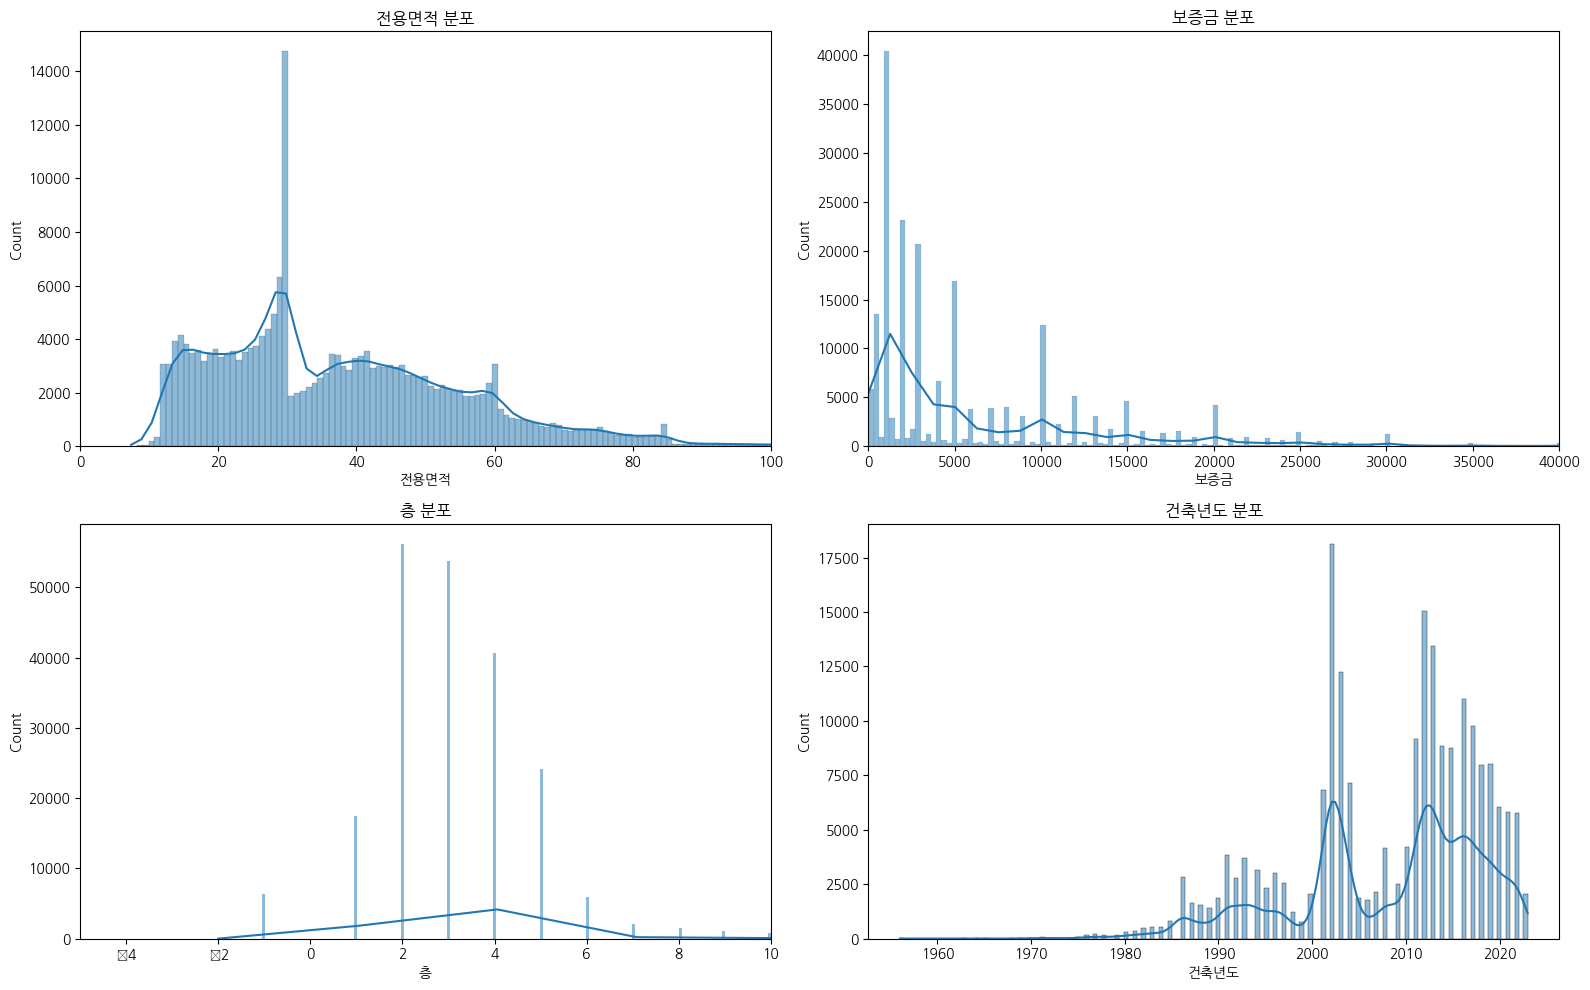

In [887]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 불러오기
df = pd.read_csv('거리계산(중복제거)/DB_변수추가/연립다세대_월세_datatype.csv')

# 한글 폰트 설정
font_path = 'NanumGothic.ttf'  # 예시 경로, 시스템에 설치된 폰트 경로로 수정
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 시각화 설정
plt.figure(figsize=(16, 10))

# 거래금액(만원) 분포도
plt.subplot(2, 2, 2)
sns.histplot(df['보증금(만원)'], kde=True)
plt.title('보증금 분포')
plt.xlabel('보증금')
plt.ylabel('Count')
#plt.ylim(0, 10000)  # y축 범위 설정
plt.xlim(0,40000)

# 전용면적(㎡) 분포도
plt.subplot(2, 2, 1)
sns.histplot(df['전용면적(㎡)'], kde=True)
plt.title('전용면적 분포')
plt.xlabel('전용면적')
plt.ylabel('Count')
#plt.ylim(0, 15000)  # y축 범위 설정
plt.xlim(0,100)

# 층 분포도
plt.subplot(2, 2, 3)
sns.histplot(df['층'], kde=True)
plt.title('층 분포')
plt.xlabel('층')
plt.ylabel('Count')
#plt.ylim(0, 100000)  # y축 범위 설정
plt.xlim(-5,10)

# 건축년도 분포도
plt.subplot(2, 2, 4)
sns.histplot(df['건축년도'], kde=True)
plt.title('건축년도 분포')
plt.xlabel('건축년도')
plt.ylabel('Count')
#plt.ylim(0, 20000)  # y축 범위 설정
#plt.xlim(1950,2030)


# 그래프 표시
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 불러오기
df = pd.read_csv('거리계산(중복제거)/DB_변수추가/연립다세대_전세_전처리2.csv')  # 경로와 인코딩 필요 시 수정

# 한글 폰트 설정
font_path = 'NanumGothic.ttf'  # 예시 경로, 시스템에 설치된 폰트 경로로 수정
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 시각화 설정
plt.figure(figsize=(16, 10))

# 거래금액(만원) 분포도 (박스플롯)
plt.subplot(2, 2, 2)
sns.boxplot(y=df['보증금(만원)'])
plt.title('보증금 분포')
plt.xlabel('보증금')
plt.ylabel('Count')
plt.ylim(0, 80000)  # y축 범위 설정

# 전용면적(㎡) 분포도 (박스플롯)
plt.subplot(2, 2, 1)
sns.boxplot(y=df['전용면적(㎡)'])
plt.title('전용면적 분포')
plt.xlabel('전용면적')
plt.ylabel('Count')
plt.ylim(0, 20)  # y축 범위 설정

# 층 분포도 (박스플롯)
plt.subplot(2, 2, 3)
sns.boxplot(y=df['층'])
plt.title('층 분포')
plt.xlabel('층')
plt.ylabel('Count')
plt.ylim(-5, 15)  # y축 범위 설정

# 건축년도 분포도 (박스플롯)
plt.subplot(2, 2, 4)
sns.boxplot(y=df['건축년도'])
plt.title('건축년도 분포')
plt.xlabel('건축년도')
plt.ylabel('Count')
# plt.ylim(1950, 2030)  # y축 범위 설정

# 그래프 표시
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_30184\3664345092.py:46: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


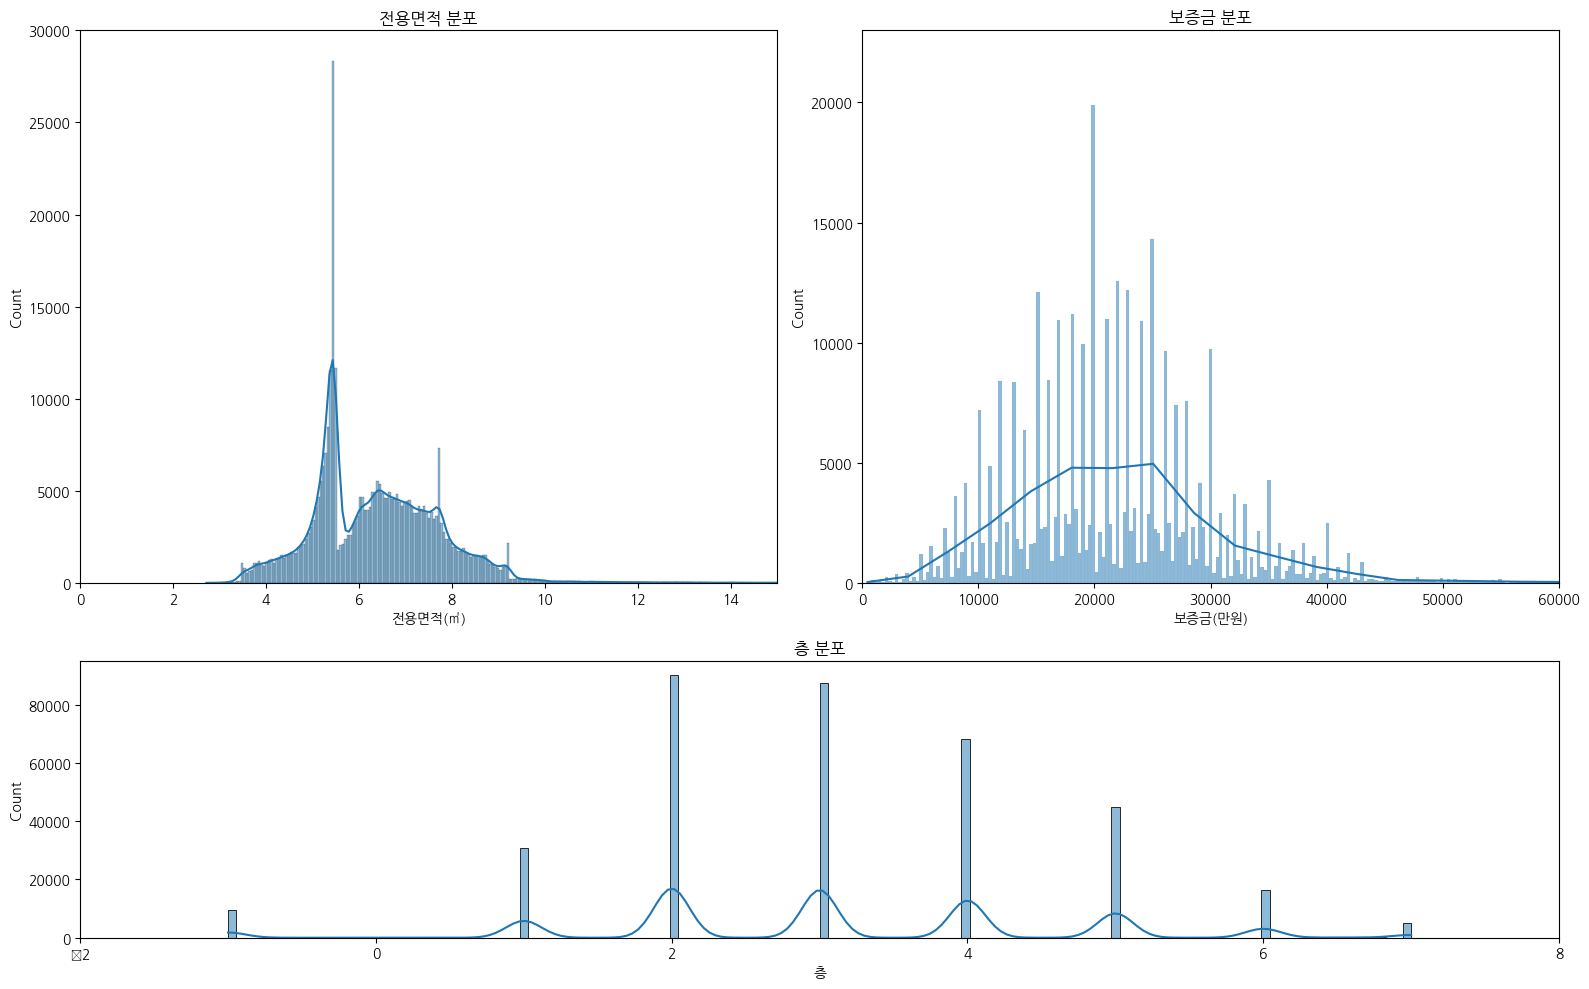

In [867]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.gridspec import GridSpec

# 데이터 불러오기
df = pd.read_csv('거리계산(중복제거)/DB_변수추가/분석용데이터_전처리완/연립다세대_전세_전처리2-3-1_이상치제거.csv')  # 경로와 인코딩 필요 시 수정

# 한글 폰트 설정
font_path = 'NanumGothic.ttf'  # 시스템에 설치된 폰트 경로로 수정
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 시각화 설정
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(2, 2, height_ratios=[1, 0.5], figure=fig)

# 전용면적(㎡) 분포도
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(df['전용면적(㎡)'], kde=True, ax=ax1)
ax1.set_title('전용면적 분포')
ax1.set_xlabel('전용면적(㎡)')
ax1.set_ylabel('Count')
ax1.set_xlim(0, 15)
ax1.set_ylim(0, 30000)

# 보증금(만원) 분포도
ax2 = fig.add_subplot(gs[0, 1])
sns.histplot(df['보증금(만원)'], kde=True, ax=ax2)
ax2.set_title('보증금 분포')
ax2.set_xlabel('보증금(만원)')
ax2.set_ylabel('Count')
ax2.set_xlim(0, 60000)
ax2.set_ylim(0, 23000)

# 층 분포도
ax3 = fig.add_subplot(gs[1, :])
sns.histplot(df['층'], kde=True, ax=ax3)
ax3.set_title('층 분포')
ax3.set_xlabel('층')
ax3.set_ylabel('Count')
ax3.set_xlim(-2, 8)

# 그래프 표시
plt.tight_layout()
plt.show()


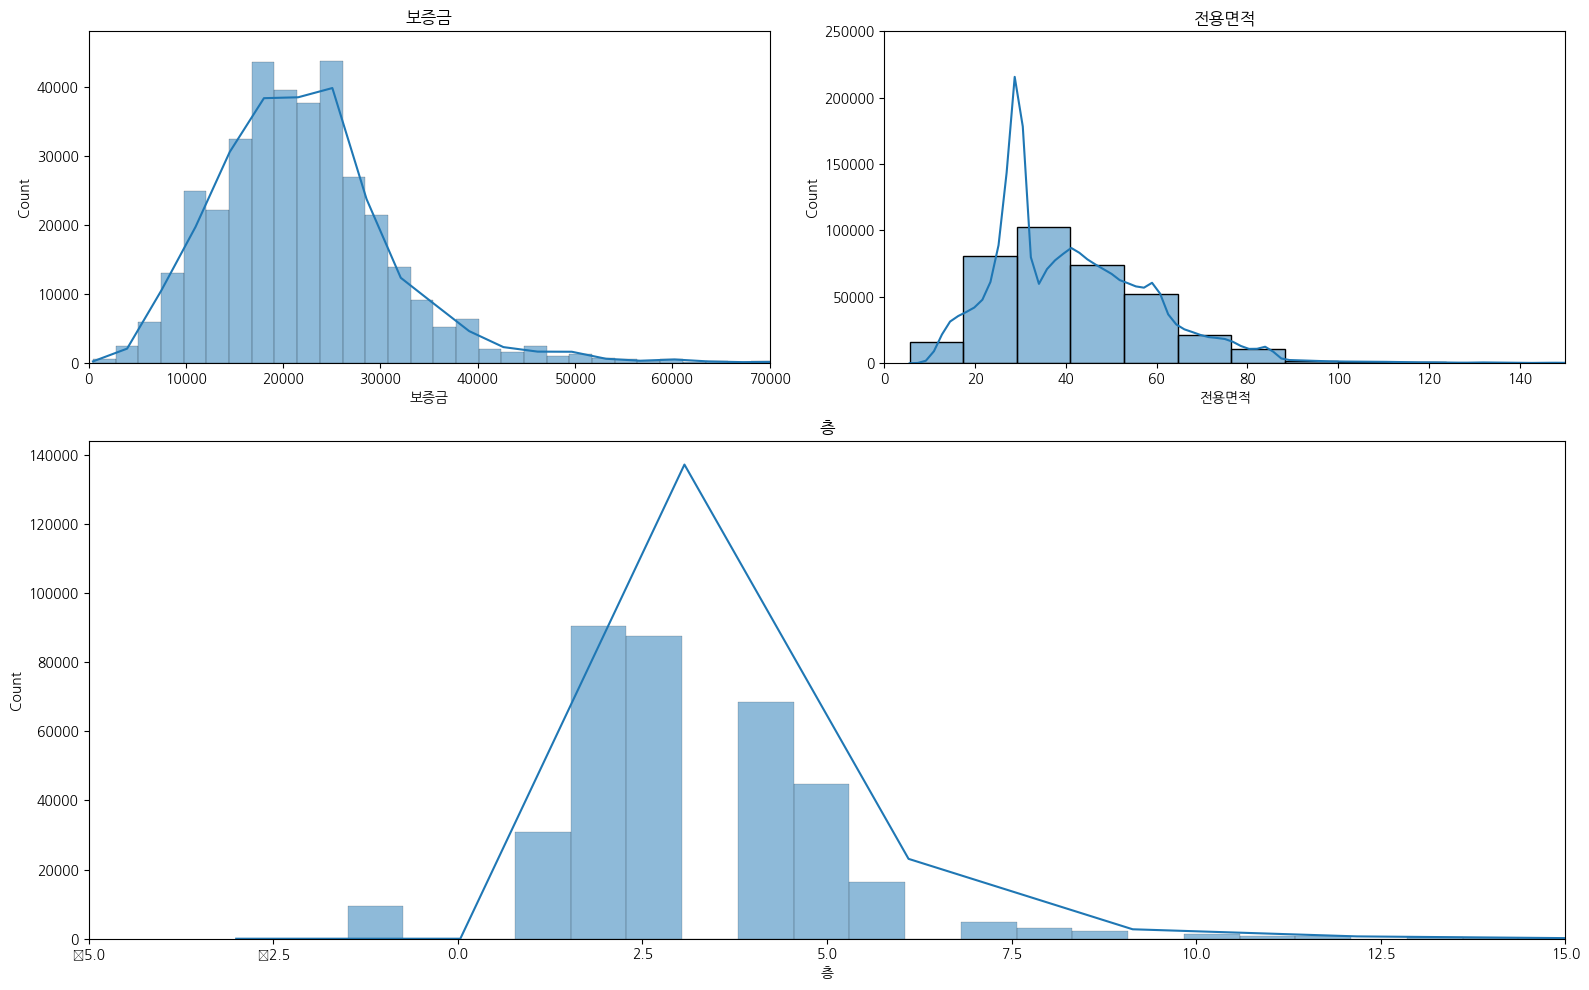

In [963]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.gridspec import GridSpec

# 데이터 불러오기
df = pd.read_csv('거리계산(중복제거)/DB_변수추가/분석용데이터_전처리완/연립다세대_전세_datatype.csv')  # 경로와 인코딩 필요 시 수정

# 한글 폰트 설정
font_path = 'NanumGothic.ttf'  # 시스템에 설치된 폰트 경로로 수정
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 사용할 변수 리스트
variables = ['전용면적(㎡)', '거래금액(만원)', '층']

# 시각화 설정
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(2, 2, height_ratios=[1, 1.5], figure=fig)

# 전용면적(㎡) 분포도
ax1 = fig.add_subplot(gs[0, 1])
sns.histplot(df['전용면적(㎡)'], bins=30, kde=True, ax=ax1)
ax1.set_title('전용면적')
plt.xlabel('전용면적')
ax1.set_xlim(0,150)
ax1.set_ylim(0, 250000)

# 거래금액(만원) 분포도
ax2 = fig.add_subplot(gs[0, 0])
sns.histplot(df['보증금(만원)'], bins=300, kde=True, ax=ax2)
ax2.set_title('보증금')
plt.xlabel('보증금')
ax2.set_xlim(0,70000)
ax2.set_ylim(0, 48000)

# 층 분포도
ax3 = fig.add_subplot(gs[1, :])
sns.histplot(df['층'], bins=800, kde=True, ax=ax3)
ax3.set_title('층')
plt.xlabel('층')
ax3.set_xlim(-5, 15)
#ax3.set_ylim(0, 100000)

# 그래프 표시
plt.tight_layout()
plt.show()


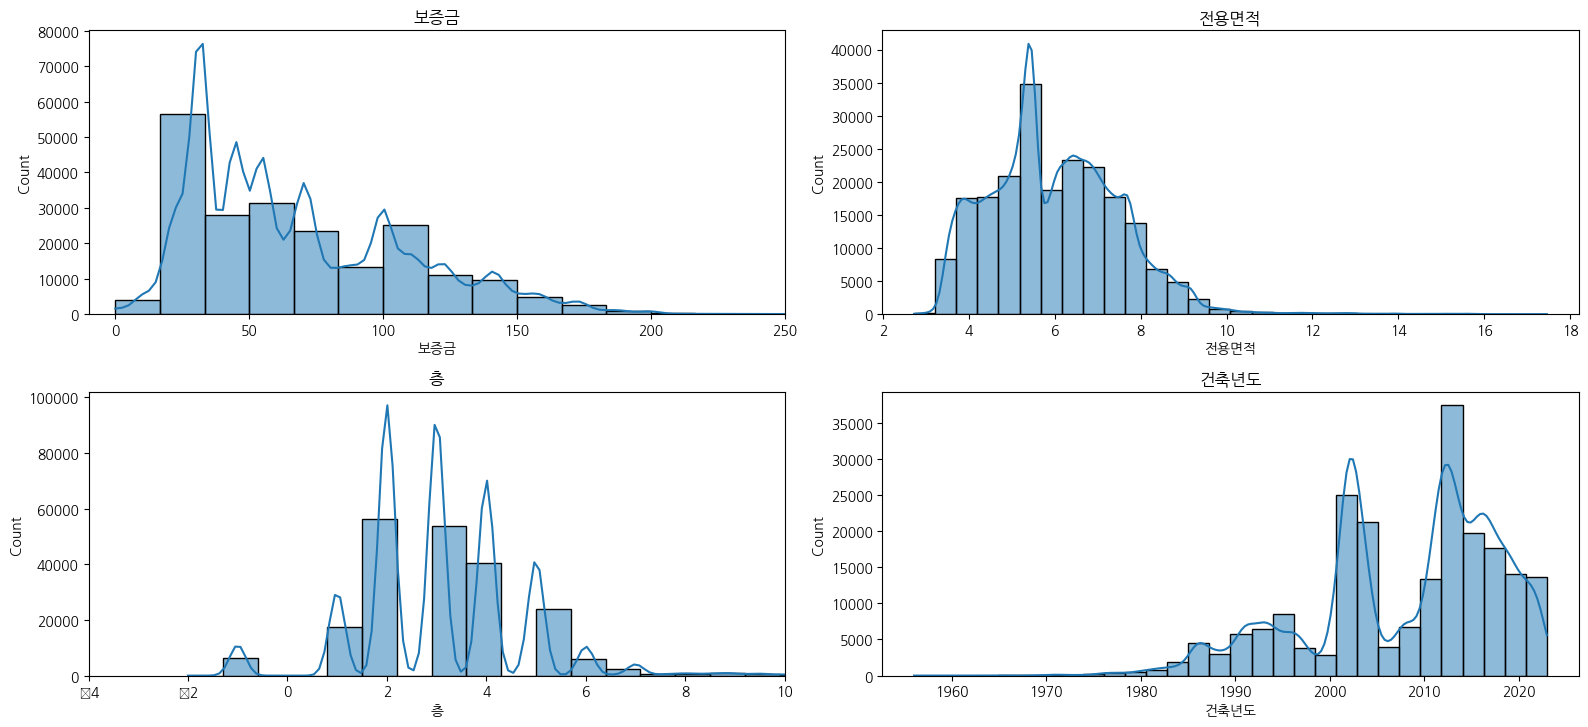

In [986]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.gridspec import GridSpec

# 데이터 불러오기
df = pd.read_csv('거리계산(중복제거)/DB_변수추가/분석용데이터_전처리완/연립다세대_월세_XGB분석.csv')  # 경로와 인코딩 필요 시 수정

# 한글 폰트 설정
font_path = 'NanumGothic.ttf'  # 시스템에 설치된 폰트 경로로 수정
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 사용할 변수 리스트
variables = ['전용면적(㎡)', '보증금(만원)', '층', '건축년도']

# 시각화 설정
fig = plt.figure(figsize=(16, 12))
gs = GridSpec(3, 2, height_ratios=[1, 1, 1.5], figure=fig)

# 전용면적(㎡) 분포도
ax1 = fig.add_subplot(gs[0, 1])
sns.histplot(df['전용면적(㎡)'], bins=30, kde=True, ax=ax1)
ax1.set_title('전용면적')
plt.xlabel('전용면적')
#ax1.set_xlim(0, 250)
#ax1.set_ylim(0, 80000)

# 보증금(만원) 분포도
ax2 = fig.add_subplot(gs[0, 0])
sns.histplot(df['보증금(만원)'], bins=30, kde=True, ax=ax2)
ax2.set_title('보증금')
plt.xlabel('보증금')
ax2.set_xlim(-10, 250)
#ax2.set_ylim(0, 40000)

# 층 분포도
ax3 = fig.add_subplot(gs[1, 0])
sns.histplot(df['층'], bins=30, kde=True, ax=ax3)
ax3.set_title('층')
plt.xlabel('층')
ax3.set_xlim(-4, 10)
#ax3.set_ylim(0, 100000)

# 건축년도 분포도
ax4 = fig.add_subplot(gs[1, 1])
sns.histplot(df['건축년도'], bins=30, kde=True, ax=ax4)
ax4.set_title('건축년도')
plt.xlabel('건축년도')
#ax4.set_xlim(df['건축년도'].min(), df['건축년도'].max())
#ax4.set_ylim(0, 50000)

# 전체 그래프 표시
plt.tight_layout()
plt.show()


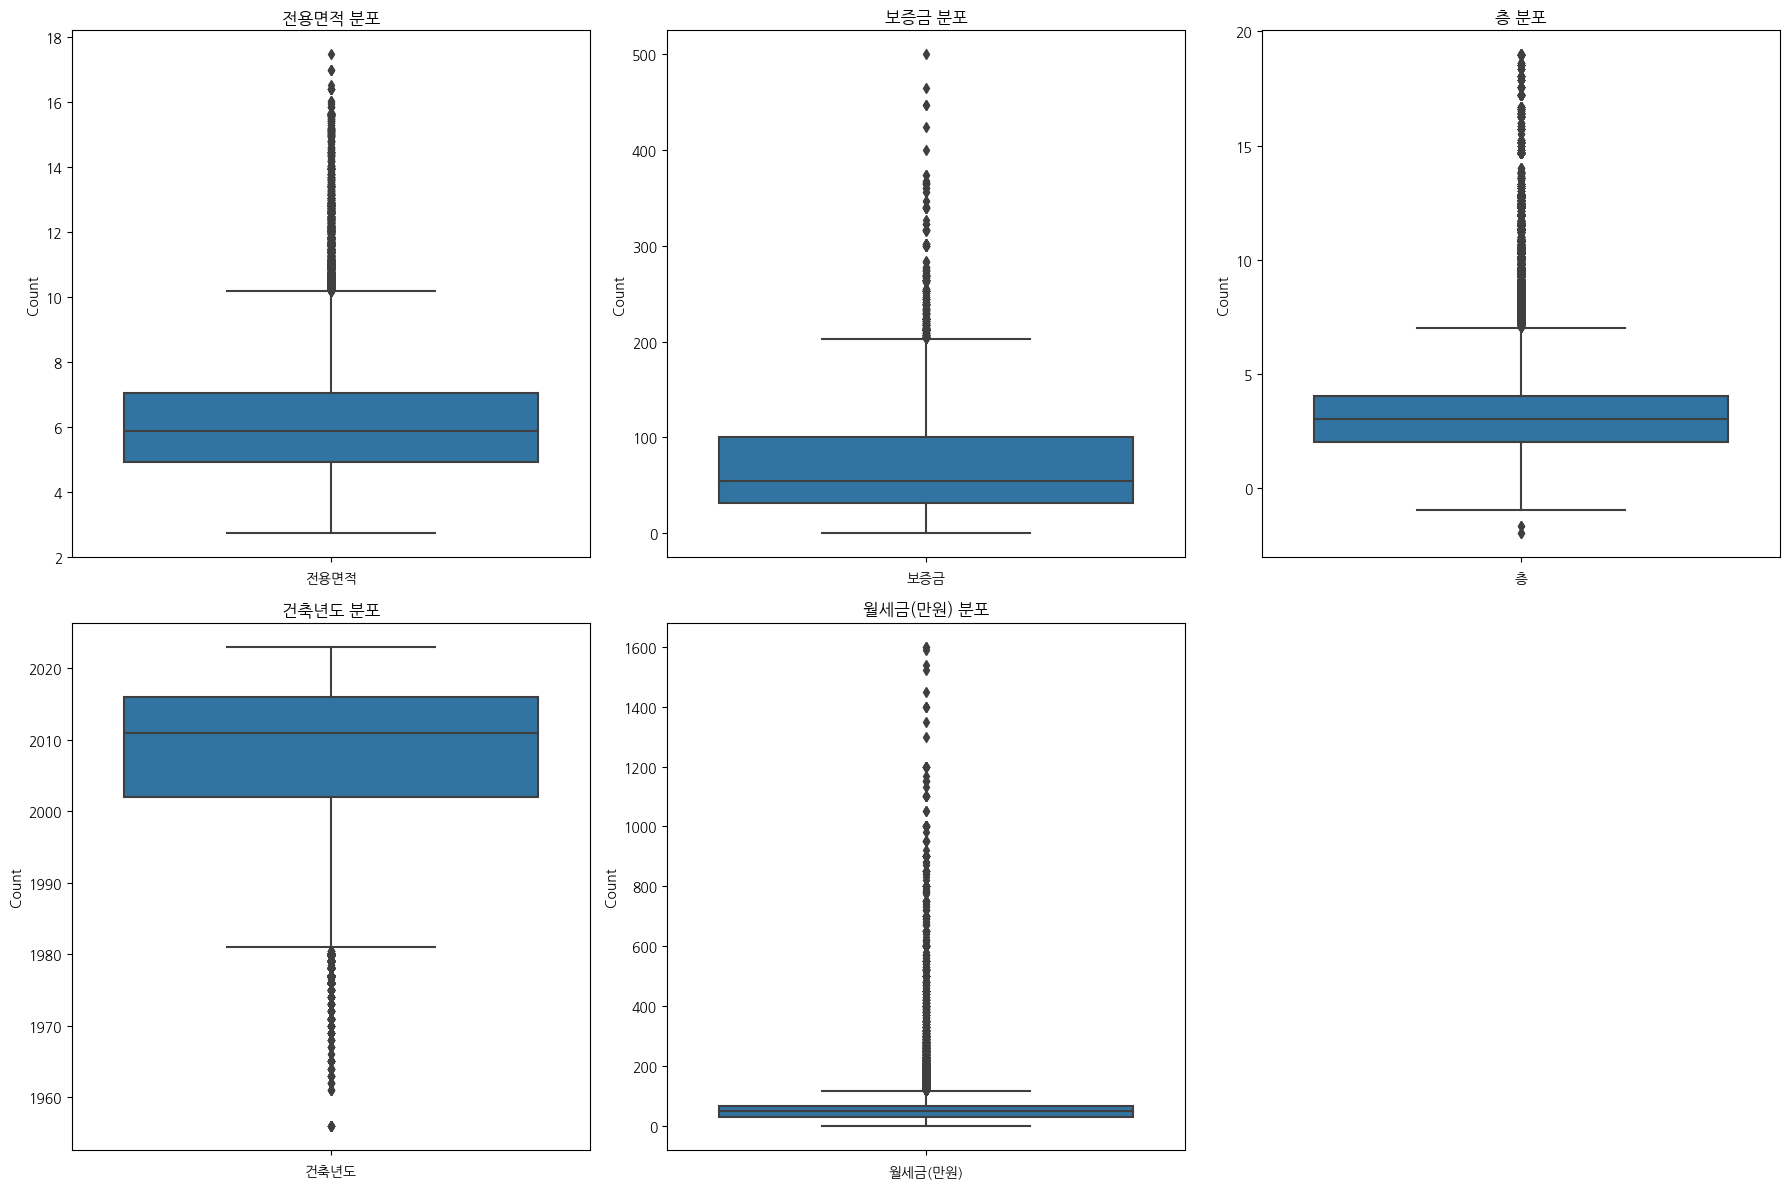

In [878]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 불러오기
df = pd.read_csv('거리계산(중복제거)/DB_변수추가/분석용데이터_전처리완/연립다세대_월세_전처리7-4_이상치제거.csv')#, encoding='euc-kr'
'''
# 보증금(만원)이 60000 이상인 값 제거
df = df[df['월세금(만원)'] < 1750]
df = df[df['층'] < 50]
#df = df[df['보증금(만원)'] < 400]
df = df[df['건축년도'] > 1960]
'''
# 한글 폰트 설정
font_path = 'NanumGothic.ttf'  # 시스템에 설치된 폰트 경로로 수정
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 시각화 설정
plt.figure(figsize=(18, 12)) #16,10

# 보증금(만원) 분포도 (박스플롯)
plt.subplot(2, 3, 2)
sns.boxplot(y=df['보증금(만원)'])
plt.title('보증금 분포')
plt.xlabel('보증금')
plt.ylabel('Count')

# 전용면적(㎡) 분포도 (박스플롯)
plt.subplot(2, 3, 1)
sns.boxplot(y=df['전용면적(㎡)'])
plt.title('전용면적 분포')
plt.xlabel('전용면적')
plt.ylabel('Count')

# 층 분포도 (박스플롯)
plt.subplot(2, 3, 3)
sns.boxplot(y=df['층'])
plt.title('층 분포')
plt.xlabel('층')
plt.ylabel('Count')

# 건축년도 분포도 (박스플롯)
plt.subplot(2, 3, 4)
sns.boxplot(y=df['건축년도'])
plt.title('건축년도 분포')
plt.xlabel('건축년도')
plt.ylabel('Count')

# 건축년도 분포도 (박스플롯)
plt.subplot(2, 3, 5)
sns.boxplot(y=df['월세금(만원)'])
plt.title('월세금(만원) 분포')
plt.xlabel('월세금(만원)')
plt.ylabel('Count')

# 그래프 표시
plt.tight_layout()
plt.show()

# cleaned 데이터 저장
#df.to_csv('거리계산(중복제거)/DB_변수추가/분석용데이터_전처리완/연립다세대_월세_이상치제거2.csv', index=False)

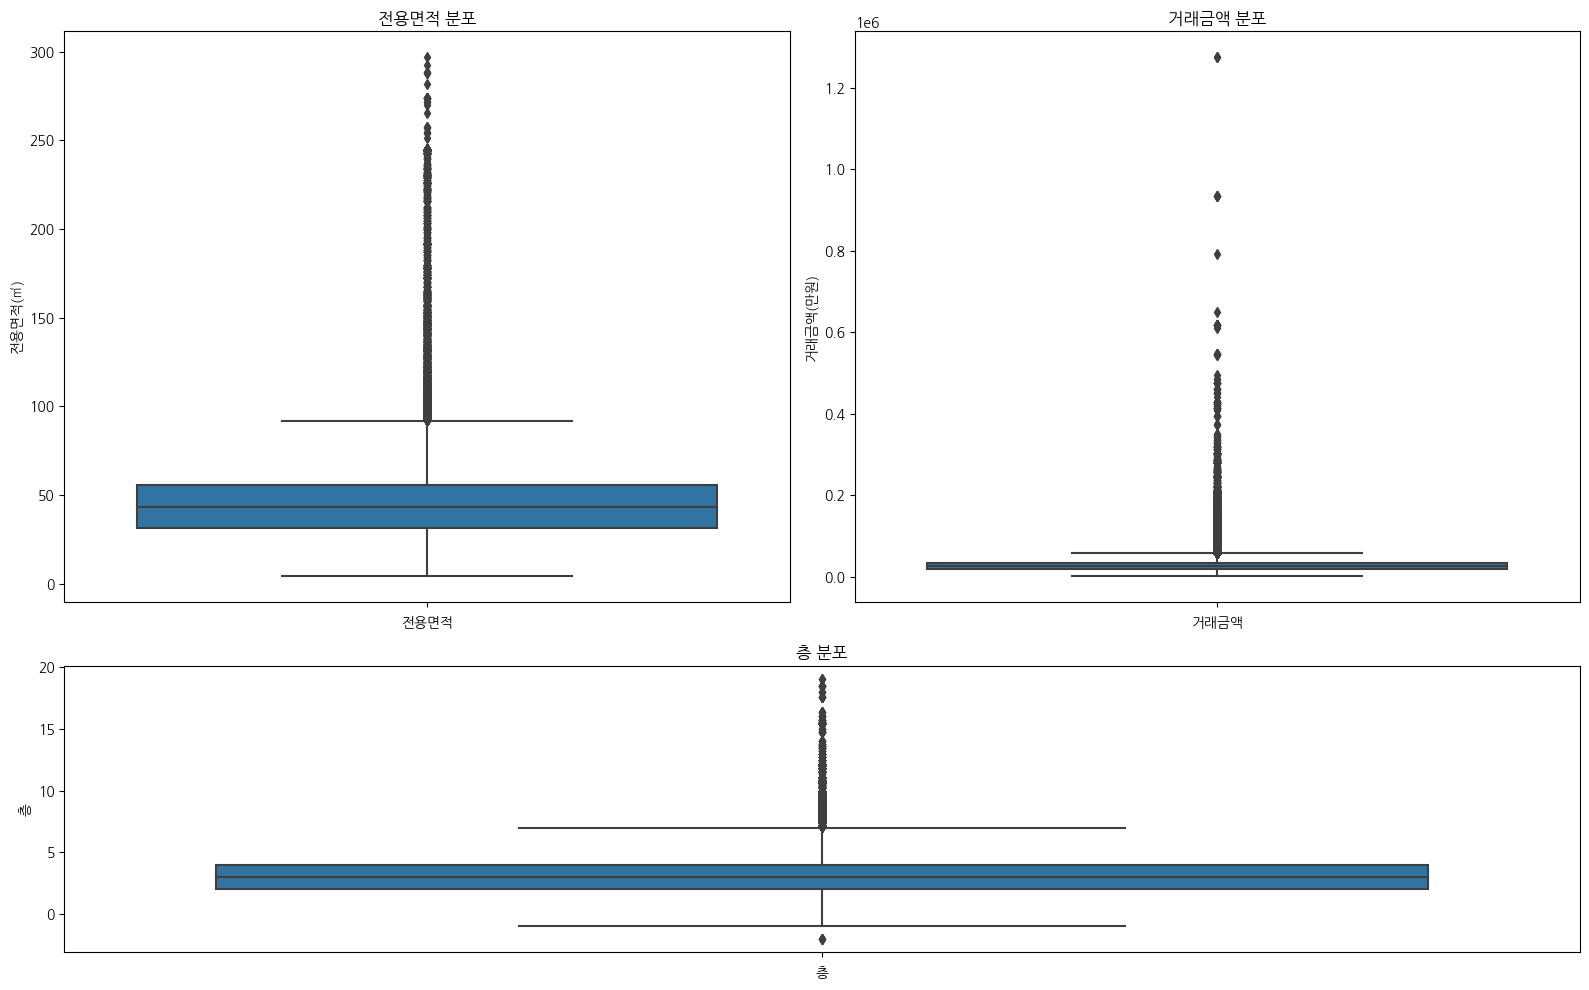

In [868]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.gridspec import GridSpec

# 데이터 불러오기
df = pd.read_csv('거리계산(중복제거)/DB_변수추가/분석용데이터_전처리완/연립다세대_매매_전처리3-3.csv')  # 경로와 인코딩 필요 시 수정

# 한글 폰트 설정
font_path = 'NanumGothic.ttf'  # 시스템에 설치된 폰트 경로로 수정
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 시각화 설정
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(2, 2, height_ratios=[1, 0.5], figure=fig)

# 전용면적(㎡) 분포도 (박스플롯)
ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(y=df['전용면적(㎡)'], ax=ax1)
ax1.set_title('전용면적 분포')
ax1.set_xlabel('전용면적')

# 보증금(만원) 분포도 (박스플롯)
ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(y=df['거래금액(만원)'], ax=ax2)
ax2.set_title('거래금액 분포')
ax2.set_xlabel('거래금액')

# 층 분포도 (박스플롯)
ax3 = fig.add_subplot(gs[1, :])
sns.boxplot(y=df['층'], ax=ax3)
ax3.set_title('층 분포')
ax3.set_xlabel('층')

# 그래프 표시
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_30184\1143755907.py:60: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


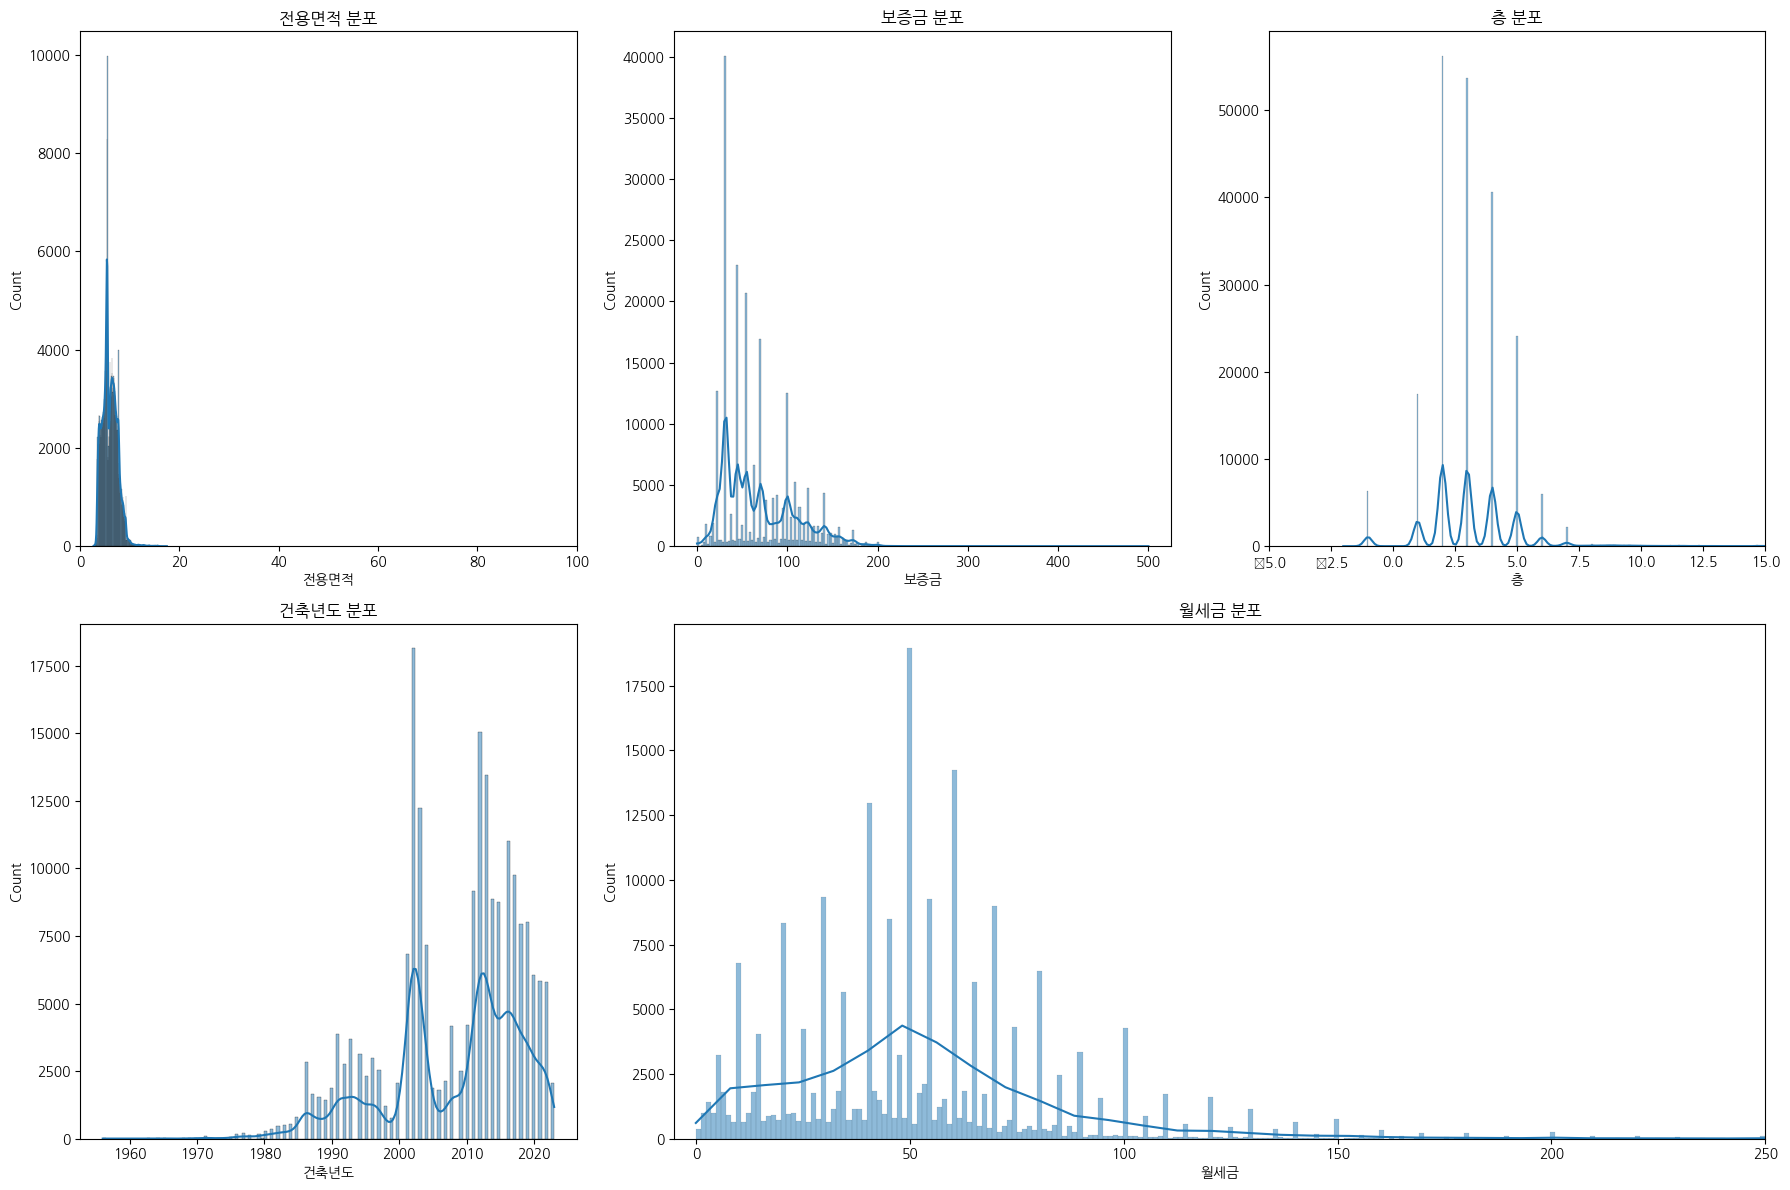

In [879]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.gridspec import GridSpec

# 데이터 불러오기
df = pd.read_csv('거리계산(중복제거)/DB_변수추가/분석용데이터_전처리완/연립다세대_월세_전처리7-4_이상치제거.csv')#, encoding='euc-kr'

# 한글 폰트 설정
font_path = 'NanumGothic.ttf'  # 예시 경로, 시스템에 설치된 폰트 경로로 수정
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 시각화 설정
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(2, 3, figure=fig)

# 전용면적(㎡) 분포도
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(df['전용면적(㎡)'], kde=True, ax=ax1)
ax1.set_title('전용면적 분포')
ax1.set_xlabel('전용면적')
ax1.set_ylabel('Count')
ax1.set_xlim(0, 100)

# 보증금(만원) 분포도
ax2 = fig.add_subplot(gs[0, 1])
sns.histplot(df['보증금(만원)'], kde=True, ax=ax2)
ax2.set_title('보증금 분포')
ax2.set_xlabel('보증금')
ax2.set_ylabel('Count')
#ax2.set_xlim(2,40000)
#ax2.set_ylim(0,50000)

# 층 분포도
ax3 = fig.add_subplot(gs[0, 2])
sns.histplot(df['층'], kde=True, ax=ax3)
ax3.set_title('층 분포')
ax3.set_xlabel('층')
ax3.set_ylabel('Count')
ax3.set_xlim(-5, 15)

# 건축년도 분포도
ax4 = fig.add_subplot(gs[1, 0])
sns.histplot(df['건축년도'], kde=True, ax=ax4)
ax4.set_title('건축년도 분포')
ax4.set_xlabel('건축년도')
ax4.set_ylabel('Count')

# 월세금(만원) 분포도
ax5 = fig.add_subplot(gs[1, 1:])
sns.histplot(df['월세금(만원)'], kde=True, ax=ax5)
ax5.set_title('월세금 분포')
ax5.set_xlabel('월세금')
ax5.set_ylabel('Count')
ax5.set_xlim(-5, 250)

# 그래프 표시
plt.tight_layout()
plt.show()


C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


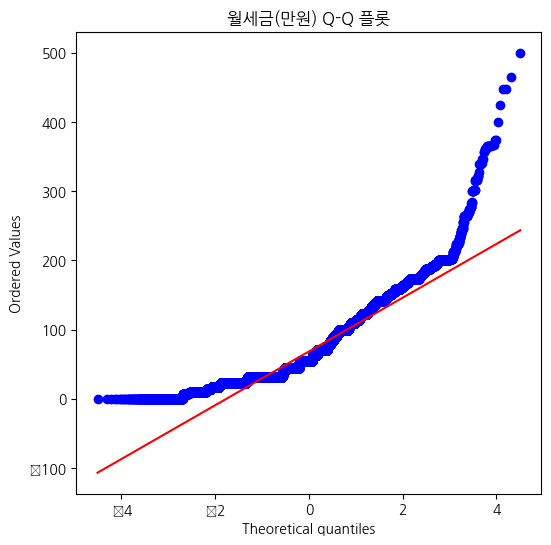

Shapiro-Wilk Test:
Test Statistic: 0.9169996976852417
p-value: 0.0


C:\Users\User\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [296]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import scipy.stats as stats

# 데이터 불러오기
df = pd.read_csv('거리계산(중복제거)/DB_변수추가/연립다세대_월세_전처리5-2.csv')  # , encoding='euc-kr'
#df.dropna(inplace=True)

# 한글 폰트 설정
font_path = 'NanumGothic.ttf'  # 예시 경로, 시스템에 설치된 폰트 경로로 수정
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 월세금(만원) Q-Q 플롯
plt.figure(figsize=(6, 6))
stats.probplot(df['보증금(만원)'], dist="norm", plot=plt)
plt.title('월세금(만원) Q-Q 플롯')
plt.show()

# 샤피로-윌크 검정
shapiro_test = stats.shapiro(df['보증금(만원)'])
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)
